# Профайлинг данных в pandas

In [ ]:
!pip install ydata-profiling

In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

### Датасет «Рейтинг разных кухонь ресторана»
[source](https://www.kaggle.com/datasets/surajjha101/cuisine-rating)

**User ID**
Идентификатор пользователя клиентов

**Area code**
Код региона проживания клиентов

**Location**
Район и город проживания клиентов

**Gender**
Пол клиента

**YOB**
Год рождения клиента

**Marital Status**
Семейное положение

**Activity**
Карьерный статус клиента - студент или профессионал

**Budget**
Бюджет, который они могут потратить в ресторане

**Cuisines**
Кухня, которую они предпочитают/любят больше всего в ресторане

**Alcohol**
Частота употребления алкоголя

**Smoker**
Частота курения

**Food Rating**
Оценка, которую они дали еде в ресторане

**Service Rating**
Оценка, которую они дали обслуживанию в ресторане

**Overall Rating**
Средняя оценка, рассчитанная на основе оценок блюд и обслуживания

**Often A S**
Часто ли они посещали ресторан или нет

In [2]:
df = pd.read_csv("Cuisine_rating.csv")

In [3]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [4]:
profile = ProfileReport(df, title="Profiling Report")

In [5]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

TemplateSyntaxError: unexpected 'end of statement block'

**Задача** 

-- Найти наиболее популярные кухни.

-- Построить гистограмму по рейтингу (общему, сервису и кухне)

-- Визуализировать зависимость бюджета и рейтинга еды

-- Визуализировать зависимость бюджета и года рождения

In [6]:
df.head(5)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [7]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
df.groupby('Cuisines')[['User ID']].count()

,User ID
Cuisines,
Chinese,24
Filipino,34
French,34
Indian,32
Italian,18
Japanese,36
Seafood,22


In [17]:
df.groupby('Cuisines')[['User ID']].count()['User ID'].min()

18

In [18]:
df.groupby('Cuisines')[['User ID']].count()['User ID'].max()

36

In [19]:
popular_cuisines = df.groupby('Cuisines')[['User ID']].count().reset_index()

In [20]:
popular_cuisines

,Cuisines,User ID
0,Chinese,24
1,Filipino,34
2,French,34
3,Indian,32
4,Italian,18
5,Japanese,36
6,Seafood,22


In [26]:
popular_cuisines['User ID'].argmin()

4

<BarContainer object of 200 artists>

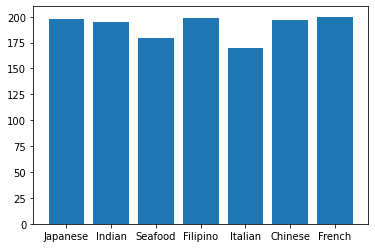

In [29]:
import matplotlib.pyplot as plt

x = list(df['Cuisines'])
y = list(df['User ID'])

plt.bar(x, y)

In [34]:
ratings = df[['Food Rating', 'Service Rating', 'Overall Rating']]

In [36]:
ratings.describe()

,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000
mean,3.220000,3.230000,3.225000
std,1.411226,1.526022,1.079445
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.500000
50%,3.000000,3.000000,3.000000
75%,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000


<AxesSubplot:xlabel='Food Rating', ylabel='Budget'>

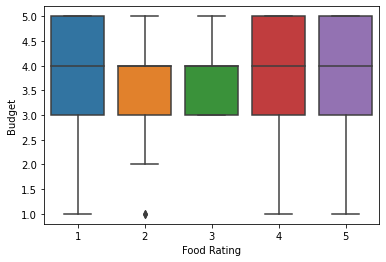

In [37]:
import seaborn as sns

sns.boxplot(x = 'Food Rating', y = 'Budget', data = df)

<AxesSubplot:xlabel='YOB', ylabel='Budget'>

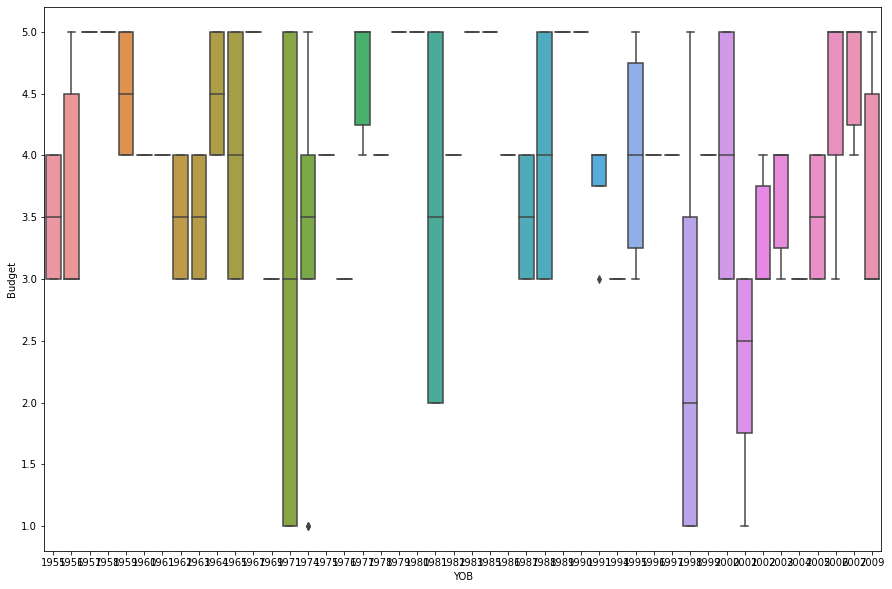

In [40]:
import seaborn as sns
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'YOB', y = 'Budget', data = df)

In [41]:
df.shape

(200, 15)

In [42]:
# Задача. Есть набор данных с геокоординатами. Объединить

In [43]:
cuisine = pd.read_csv("Cuisine_rating.csv")
coord = pd.read_csv("coord_city5.csv")

In [45]:
cuisine.index

RangeIndex(start=0, stop=200, step=1)

In [48]:
cuisine.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

In [47]:
coord.index

RangeIndex(start=0, stop=10, step=1)

In [49]:
coord.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [50]:
coord.head(3)

,Unnamed: 0,0
0,"Upper West Side,NY","[40.786843,-73.975698]"
1,"Central Park,ny","[40.782507,-73.965502]"
2,"Riverdale,NY","[40.9043,-73.914388]"


In [51]:
cuisine_coord = cuisine.merge(coord, how='left', 
                                         left_on='Location', 
                                         right_on='Unnamed: 0',
                                         suffixes=('','_region')
                                        )

In [52]:
cuisine_coord.head(5)

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Unnamed: 0,0
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,"Upper East Side,NY","[40.774033,-73.955737]"
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,"St. George,NY","[40.644158,-74.073461]"
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,"Upper West Side,NY","[40.786843,-73.975698]"
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,"Upper East Side,NY","[40.774033,-73.955737]"
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,"Central Park,NY","[40.782507,-73.965502]"


In [54]:
df1 = cuisine_coord[['Location', 'User ID', 'Overall Rating']]
df1.head()

,Location,User ID,Overall Rating
0,"Upper East Side,NY",1,4.5
1,"St. George,NY",2,1.0
2,"Upper West Side,NY",3,5.0
3,"Upper East Side,NY",4,2.0
4,"Central Park,NY",5,3.0


In [55]:
df2 = cuisine_coord[['Cuisines', 'User ID', 'YOB']]
df2.head()

,Cuisines,User ID,YOB
0,Japanese,1,2006
1,Indian,2,1991
2,Seafood,3,1977
3,Japanese,4,1956
4,Filipino,5,1997


In [57]:
df3 = cuisine_coord[['User ID', 'Gender']]
df3.head()

,User ID,Gender
0,1,Female
1,2,Female
2,3,Male
3,4,Female
4,5,Male


In [59]:
df4 = cuisine_coord[['Area code', 'Location']]
df4.head()

,Area code,Location
0,153,"Upper East Side,NY"
1,123,"St. George,NY"
2,122,"Upper West Side,NY"
3,153,"Upper East Side,NY"
4,129,"Central Park,NY"


In [61]:
df4.drop_duplicates(subset = 'Area code', inplace = True)
df4

/var/folders/2x/wnh_0jw147xg4qlczcty3m9w0000gn/T/ipykernel_47304/4148378592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop_duplicates(subset = 'Area code', inplace = True)


,Area code,Location
0,153,"Upper East Side,NY"
1,123,"St. George,NY"
2,122,"Upper West Side,NY"
4,129,"Central Park,NY"
5,111,"China Town, NY"
...,...,...
180,163,"Market City, NY"
191,178,"China Town, NY"
193,103,"Riverdale,NY"
196,170,"Upper West Side,NY"


In [62]:
df1.head(2)

,Location,User ID,Overall Rating
0,"Upper East Side,NY",1,4.5
1,"St. George,NY",2,1.0


In [63]:
df2.head(2)

,Cuisines,User ID,YOB
0,Japanese,1,2006
1,Indian,2,1991


In [75]:
YOB_rating = df1.merge(df2, how='left', 
                                         left_on='User ID', 
                                         right_on='User ID')[['YOB', 'Overall Rating']]
YOB_rating.groupby(['YOB', 'Overall Rating'])['Overall Rating'].count()

YOB   Overall Rating
1955  2.5               2
      5.0               2
1956  1.0               1
      2.0               3
      2.5               2
                       ..
2007  1.5               1
      2.0               1
      5.0               4
2009  3.0               3
      4.0               3
Name: Overall Rating, Length: 103, dtype: int64

In [78]:
df1.head(3)

,Location,User ID,Overall Rating
0,"Upper East Side,NY",1,4.5
1,"St. George,NY",2,1.0
2,"Upper West Side,NY",3,5.0


In [77]:
df3.head(3)

,User ID,Gender
0,1,Female
1,2,Female
2,3,Male


In [81]:
gender_rating = df1.merge(df3, how='left', 
                                         left_on='User ID', 
                                         right_on='User ID')
gender_rating.drop('User ID', axis = 1, inplace = True)
gender_rating.head(3)

,Location,Overall Rating,Gender
0,"Upper East Side,NY",4.5,Female
1,"St. George,NY",1.0,Female
2,"Upper West Side,NY",5.0,Male


In [82]:
gender_rating.groupby(['Location', 'Gender'])['Overall Rating'].mean()

Location            Gender
Cedar Hill, NY      Male      3.500000
Central Park,NY     Female    4.000000
                    Male      3.156250
Central Park,ny     Female    3.500000
                    Male      3.750000
China Town, NY      Female    3.250000
                    Male      3.138889
Market City, MY     Male      3.000000
Market City, NY     Female    3.625000
                    Male      3.791667
Riverdale,NY        Female    3.428571
                    Male      2.678571
St. George,NY       Female    3.194444
                    Male      3.071429
Upper East Side,NY  Female    3.000000
                    Male      3.041667
Upper West Side,NY  Female    3.300000
                    Male      2.937500
Name: Overall Rating, dtype: float64

In [83]:
df1.head(3)

,Location,User ID,Overall Rating
0,"Upper East Side,NY",1,4.5
1,"St. George,NY",2,1.0
2,"Upper West Side,NY",3,5.0


In [84]:
df2.head(3)

,Cuisines,User ID,YOB
0,Japanese,1,2006
1,Indian,2,1991
2,Seafood,3,1977


In [ ]:
# средний рейтинг по кухням в зависимости от пола
# Japanese Female 3.5
#          male 4.0

In [85]:
df3.head(3)

,User ID,Gender
0,1,Female
1,2,Female
2,3,Male


In [93]:
cuisine_rating = df1.merge(df2, how='left', 
                                         left_on='User ID', 
                                         right_on='User ID')[['Cuisines', 'Overall Rating', 'User ID'
                                                             ]]
cuisine_rating_gender = cuisine_rating.merge(df3, how='left', 
                                         left_on='User ID', 
                                         right_on='User ID')[['Cuisines', 'Overall Rating',
                                                             'Gender']]
cuisine_rating_gender.groupby(['Cuisines', 'Gender'])['Overall Rating'].agg(['min', 'max', 'mean'])

min  max      mean
Cuisines Gender                    
Chinese  Female  1.5  5.0  3.321429
         Male    2.0  4.0  3.200000
Filipino Female  2.0  5.0  3.291667
         Male    1.0  4.0  2.909091
French   Female  1.5  5.0  3.093750
         Male    2.0  5.0  3.111111
Indian   Female  1.0  4.5  3.150000
         Male    1.0  5.0  3.181818
Italian  Female  1.0  5.0  3.250000
         Male    2.0  4.0  3.083333
Japanese Female  2.0  5.0  3.821429
         Male    2.0  5.0  3.454545
Seafood  Female  3.0  4.0  3.500000
         Male    1.5  5.0  3.055556